## Washington Homes for Sale

Washington Homes for Sale es una empresa inmobiliaria que comercializa viviendas en Washington State, USA. La empresa cuenta con una base de datos que contiene los precios de venta de las viviendas vendidas en los últimos años en Washington, así como información acerca de estas casas y apartamentos como el número de cuartos, número de metros cuadrados, condición de la vivienda, entre otros. Usted ha sido contratado por la empresa para desarrollar un sistema de aprendizaje automático que permita predecir el precio de venta de una vivienda, a partir de los datos de esta vivienda. Dicho sistema le permitirá a la empresa tener un estimado del precio al cual se puede poner en venta cada vivienda, además, cuando un cliente propone vender su vivienda en cierta cantidad, la empresa podrá saber si este monto está por encima o por debajo del precio del mercado, y podrá orientar al cliente en este sentido.

# AMBIENTE

In [29]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# OBTENIENDO Y VISUALIZANDO LOS DATOS

In [30]:
homesOriginal = pd.read_csv("datasets/homes.csv")
homes = homesOriginal

In [31]:
homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [33]:
homes["date"].value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64

In [34]:
from datetime import datetime
def custom_string_to_year(item):
    str_date = item.split("T")[0]
    return datetime.strptime(str_date, '%Y%m%d').year

def custom_string_to_month(item):
    str_date = item.split("T")[0]
    return datetime.strptime(str_date, '%Y%m%d').month

In [35]:
homes['dateYEAR'] = homes['date'].transform(custom_string_to_year)
homes['dateMONTH'] = homes['date'].transform(custom_string_to_month)

In [36]:
homes.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateYEAR,dateMONTH
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [37]:
homes.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateYEAR,dateMONTH
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


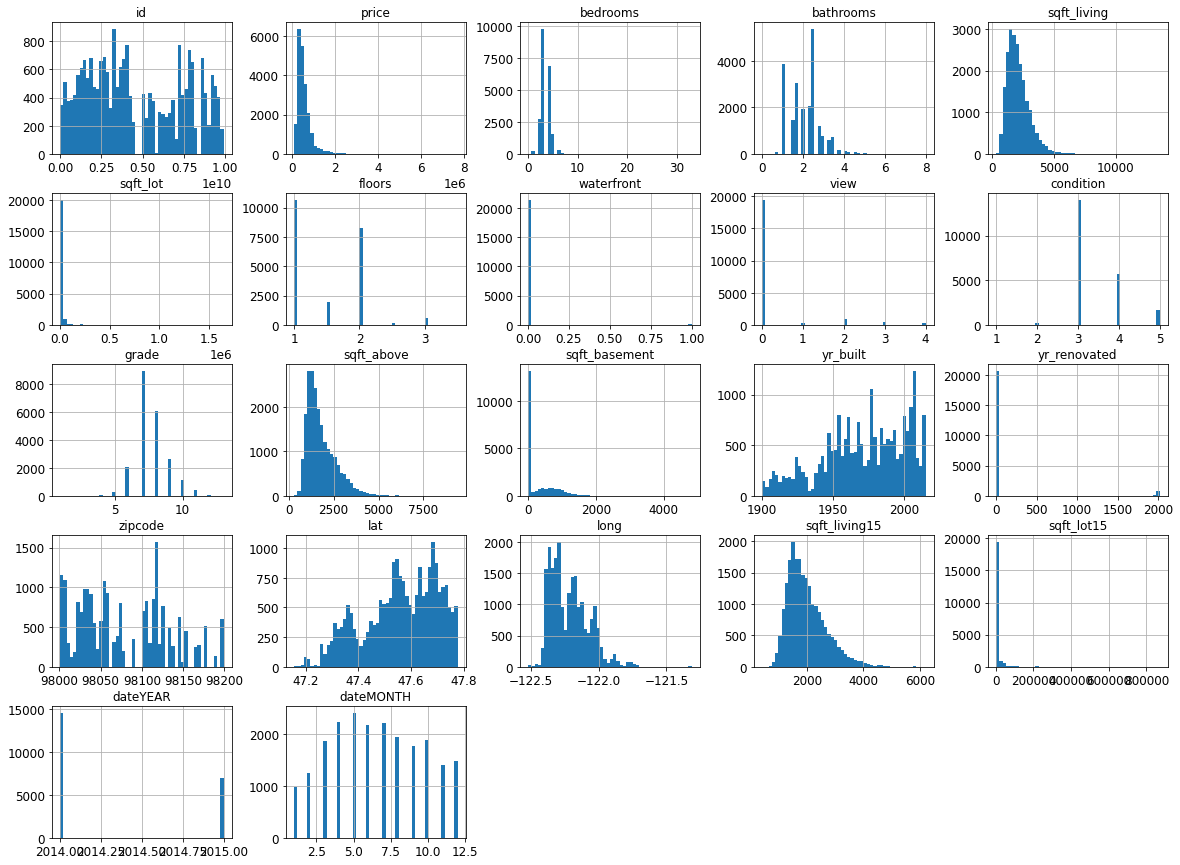

In [38]:
homes.hist(bins=50, figsize=(20,15))
plt.show()

Corroborando que no exiten atributos NULL

In [39]:
incomplete_colums = homes.isnull().any()
incomplete_colums

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dateYEAR         False
dateMONTH        False
dtype: bool

<AxesSubplot:xlabel='long', ylabel='lat'>

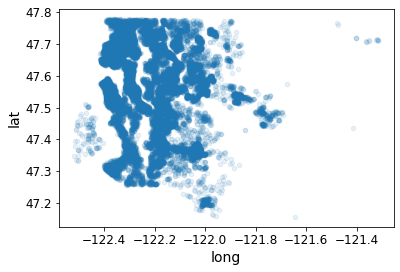

In [40]:
homes.plot(kind="scatter", x="long", y="lat", alpha=0.1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


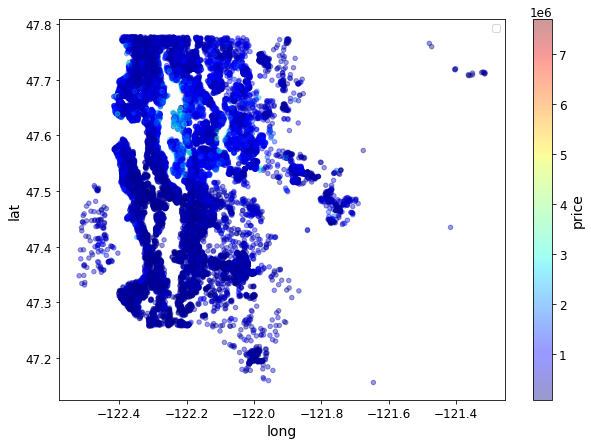

In [41]:
homes.plot(kind="scatter", x="long", y="lat", alpha=0.4,
              figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# VERIFICANDO CORRELACIÓN

In [42]:
corr_matrix = homes.corr()

In [43]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
dateYEAR         0.003576
dateMONTH       -0.010081
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='grade', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='grade'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='grade'>,
        <AxesSubplot:xlabel='grade', ylabel='grade'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='grade'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='grade', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>]],
      dtype=object)

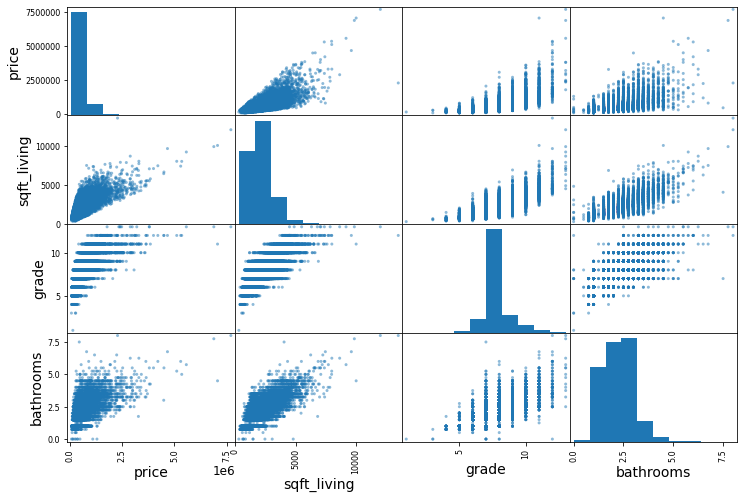

In [44]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "grade",
              "bathrooms"]
scatter_matrix(homes[attributes], figsize=(12, 8))

## Excluyendo atributos no correlacionados al precio

In [45]:
homesDeleted = homes

In [46]:
homesDeleted.drop('zipcode' , inplace=True , axis=1)
homesDeleted.drop('id' , inplace=True , axis=1)
homesDeleted.drop('dateMONTH' , inplace=True , axis=1)
homesDeleted.drop('dateYEAR' , inplace=True , axis=1)
homesDeleted.drop('date' , inplace=True , axis=1)


In [47]:
homesDeleted.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


# GENERANDO LOS CONJUNTOS DE ENTRNAMIENTO Y PRUEBA

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(homesDeleted, test_size=0.2, random_state=42)

# ENTRENANDO MODELOS

## Regresión lineal

In [49]:
train_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
6325,325000.0,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,47.3670,-122.152,2750,13095
13473,257000.0,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,47.5520,-122.290,1270,5000
17614,228500.0,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,47.4838,-122.335,1170,7800
16970,288000.0,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,47.3951,-122.172,1800,7350
20868,479000.0,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,47.7043,-122.209,2090,10454


In [50]:
homes_train_X = train_set.drop("price", axis=1)
homes_train_Y = train_set["price"].copy()

homes_test_X = test_set.drop("price", axis=1)
homes_test_Y = test_set["price"].copy()

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(homes_train_X, homes_train_Y)

LinearRegression()

In [52]:
some_labels = homes_test_Y[:5]
some_data_prepared = homes_test_X[:5]

print("Predictions:", lin_reg.predict(homes_test_X))

Predictions: [ 466542.01642828  776114.26499276 1212668.57336058 ...  390487.32120115
  593654.26179972  409770.27218125]


In [53]:
print("Labels:", list(some_labels))

Labels: [365000.0, 865000.0, 1038000.0, 1490000.0, 711000.0]


In [54]:
from sklearn.metrics import mean_squared_error

homes_predictions = lin_reg.predict(homes_test_X)
lin_mse = mean_squared_error(homes_test_Y, homes_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

214472.75555898348

## Árbol de desición

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(homes_train_X, homes_train_Y)

DecisionTreeRegressor(random_state=42)

In [56]:
homes_predictions = tree_reg.predict(homes_test_X)
tree_mse = mean_squared_error(homes_test_Y, homes_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

204108.8681735143

In [57]:
homes_predictions[:5]

array([ 435000.,  825000., 1355000., 1815000.,  712000.])

In [58]:
homes_test_Y[:5]

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
Name: price, dtype: float64

## Cross validation

In [59]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

Cross validation en regresión lineal

In [60]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, homes_train_X, homes_train_Y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

NameError: name 'cross_val_score' is not defined

Cross validation en árbol de desición

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, homes_train_X, homes_train_Y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [170060.51182581 227254.6275121  168666.19698988 169388.98772151
 163988.62730234 187829.88575147 167016.52308467 202127.30142018
 195557.76502708 169982.22328273]
Mean: 182187.26499177795
Standard deviation: 19604.23384824147


## Modelos de ensamblaje

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)
forest_reg.fit(homes_train_X, homes_train_Y)

RandomForestRegressor(n_estimators=20, random_state=42)

In [ ]:
homes_predictions = forest_reg.predict(homes_test_X)
forest_mse = mean_squared_error(homes_test_Y, homes_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

151327.30223316693

In [ ]:
homes_predictions[:5]

array([ 368957.5,  908608. , 1039412.5, 1891750. ,  715395. ])

In [ ]:
homes_test_Y[:5]

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
Name: price, dtype: float64

In [ ]:
forest_scores = cross_val_score(forest_reg, homes_train_X, homes_train_Y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [128374.31996434 161394.67161798 125570.2177859  141551.81296563
 126459.69757837 138759.45694246 119881.08052899 125894.58254023
 129919.32310763 121600.24747426]
Mean: 131940.54105057853
Standard deviation: 11759.038061610729


# AFINANDO LOS MODELOS: Grid Search

Por razones de poder de cómputo, no se evaluarán mas hiperparámetros ni un numero muy elevado de n_estimators

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 25, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [10, 25], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(homes_train_X, homes_train_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 25, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [10, 25]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

155163.55396455913 {'max_features': 2, 'n_estimators': 10}
144102.36078739454 {'max_features': 2, 'n_estimators': 25}
142317.4978407253 {'max_features': 2, 'n_estimators': 100}
140034.95944672477 {'max_features': 4, 'n_estimators': 10}
133937.8600214541 {'max_features': 4, 'n_estimators': 25}
131942.68468456084 {'max_features': 4, 'n_estimators': 100}
138967.15375543167 {'max_features': 6, 'n_estimators': 10}
131277.08503897215 {'max_features': 6, 'n_estimators': 25}
128483.58689431756 {'max_features': 6, 'n_estimators': 100}
135547.51879942074 {'max_features': 8, 'n_estimators': 10}
129343.3726850976 {'max_features': 8, 'n_estimators': 25}
126289.76988036242 {'max_features': 8, 'n_estimators': 100}
149935.9692035092 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
142449.33126561498 {'bootstrap': False, 'max_features': 2, 'n_estimators': 25}
144181.79119564366 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
133775.23946174042 {'bootstrap': False, 'max_features':

# MODELO FINAL

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(homes_test_X)
final_mse = mean_squared_error((homes_test_Y), final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

152836.10239549784